In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import os
import glob
import datetime
from datetime import datetime as dat
import jdatetime
from jdatetime import datetime as jdt
from numpy import random as nprnd
import persiantools
from persiantools import characters
import luigi
import networkx as nx
from pyvis.network import Network
from networkx import NetworkXError
from networkx import bipartite
import networkx.algorithms.connectivity as nxcon
import math
import networkx.algorithms.community as nxcom
import itertools
import math
import time

Matplotlib is building the font cache; this may take a moment.


# Default measuers

In [3]:
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [4]:
seed= hash("Netswork Science in python")%2**32
nprnd.seed(seed=seed)
random.seed(seed)

# NetworkX

## Undirected Graph

### Drawing simple network

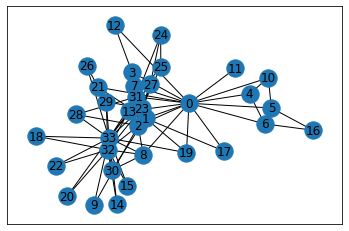

In [9]:
G= nx.karate_club_graph()
karate_pos= nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

### Nodes and edges Information

In [15]:
# in [] and () should write lable or id of the node
G.nodes[32]
G.edges(32)

EdgeDataView([(32, 2), (32, 8), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (32, 29), (32, 30), (32, 31), (32, 33)])

### Node & Edge Attributes

In [20]:
member_club=[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1]

In [21]:
for node_id in G.nodes:
    G.nodes[node_id]['Attr_1']= member_club[node_id]

In [22]:
node_color= [ 
    '#bb7a44' if G.nodes[v]['Attr_1']== 0
    else '#33a02c' for v in G
]

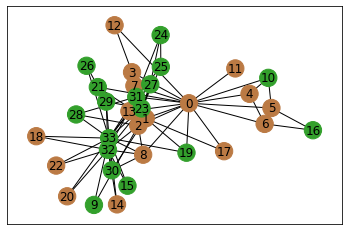

In [23]:
nx.draw_networkx(G, karate_pos, node_color=node_color)

In [24]:
for v, w in G.edges:
    if G.nodes[v]['Attr_1']== G.nodes[w]['Attr_1']:
        G.edges[v, w]['internal']= True
    else:
        G.edges[v, w]['internal']= False

In [25]:
internal= [e for e in G.edges if G.edges[e]['internal']]
extenal= [e for e in G.edges if ~G.edges[e]['internal']]

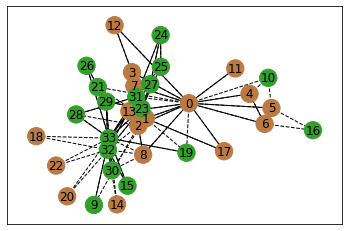

In [26]:
# for drawing edge attribute should draw node and edges seprately
nx.draw_networkx_nodes(G, karate_pos, node_color=node_color)
nx.draw_networkx_labels(G, karate_pos)
nx.draw_networkx_edges(G, karate_pos, edgelist= internal)
nx.draw_networkx_edges(G, karate_pos, edgelist= extenal, style='dashed')

### Tie Strength

In [27]:
def tie_strength(G, v, w):
    # get neighbors of nodes v and w in G
    v_neighbors= set(G.neighbors(v))
    w_neighbors= set(G.neighbors(w))
    # return size of the set intersection
    return 1+ len(v_neighbors & w_neighbors)

### Adding Weight

In [28]:
for v, w in G.edges:
    G.edges[v, w]['weight']= tie_strength(G, v, w)
    edge_weight= [G.edges[v, w]['weight']for v, w in G.edges]

In [29]:
weight_pos= nx.spring_layout(G, pos=karate_pos, k=0.3, weight='weight')

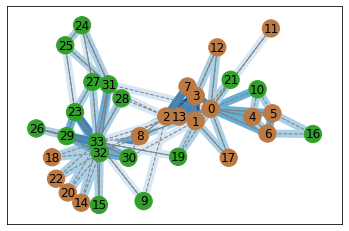

In [30]:
nx.draw_networkx(G, weight_pos, width=8, node_color=node_color,
    edge_color= edge_weight, edge_cmap= plt.cm.Blues, edge_vmin=0, edge_vmax=6)
nx.draw_networkx_edges(G, weight_pos, edgelist=internal, edge_color='gray')
nx.draw_networkx_edges(G, weight_pos, edgelist=extenal, style='dashed', edge_color='gray')

## DiGraph class - when direction matters

### drawing directed graph

In [38]:
pasarged= pd.read_excel(r'C:/Users/ah.roudsaz/Desktop/code/NetworkX_graph/Data/Example/directed_pasargad.xlsx')

In [41]:
pasarged['Tuple_e']= list(pasarged[['source','target']].itertuples(index=False, name=None))
edge_list= list(pasarged['Tuple_e'])

In [43]:
G= nx.DiGraph()
G.add_edges_from(edge_list)

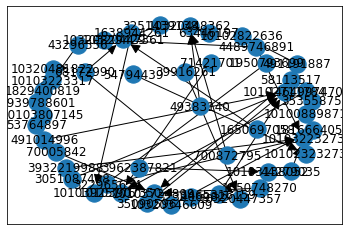

In [45]:
directed_pos= nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, directed_pos, arrowsize= 20)

### find ingoing and outgoing edges for node

In [46]:
list(G.neighbors(10102711784))

[]

In [47]:
list(G.successors(10102711784))

[]

In [48]:
list(G.predecessors(10102711784))

[491014996, 35090596, 1465316159, 3051087408]

### convert directed graph to undirecrted

In [49]:
G_undirected= G.to_undirected()

In [50]:
# converting only both direction edges to undirected
# in this case only the both direction edges that convert to undirected will remain
G_both= G.to_undirected(reciprocal=True)

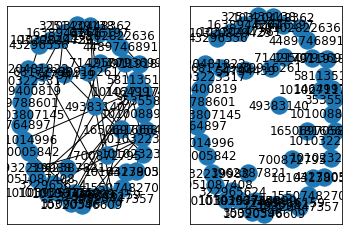

In [51]:
plt.subplot(1, 2, 1)
nx.draw_networkx(G_undirected, directed_pos)
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, directed_pos)

### Subgraph

In [52]:
G_sub= G.subgraph([491014996,10102711784])

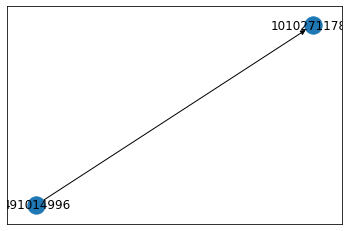

In [53]:
nx.draw_networkx(G_sub, directed_pos)

### AFFILIATION network_ Bipartite

#### affiliation

In [54]:
G= nx.karate_club_graph()
try:
    left, right= bipartite.sets(G)
    print('left nodes\n', left)
    print('\nright nodes\n', right)
except NetworkXError as e:
    print(e)

Graph is not bipartite.


In [55]:
B= nx.Graph()

In [56]:
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])

In [58]:
try:
    left, right= bipartite.sets(B)
    print('left nodes\n', left)
    print('\nright nodes\n', right)
except NetworkXError as e:
    print(e)

left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


#### Projected co-affilation

In [61]:
node_list= list(G.nodes())

In [63]:
G_projected= bipartite.projected_graph(B, nodes= node_list)

{0: Text(0.038979668717415684, 0.2749194622326233, '0'),
 (0, 1): Text(-0.5476092421491301, 0.49675131341460504, '(0, 1)'),
 (0, 2): Text(0.2775639343496711, 0.031864809541827736, '(0, 2)'),
 (0, 3): Text(0.47359753829802564, 0.5466949622529452, '(0, 3)'),
 (0, 4): Text(-0.5768486842727815, -0.10807631128668685, '(0, 4)'),
 (0, 5): Text(0.16736207905646242, -0.11222474538162897, '(0, 5)'),
 (0, 6): Text(-0.1927643724280936, -0.25696694825654554, '(0, 6)'),
 (0, 7): Text(-0.027109824492649925, 0.9439146053615561, '(0, 7)'),
 (0, 8): Text(0.451033523175332, -0.07559746372635398, '(0, 8)'),
 (0, 10): Text(0.42520753547957024, -0.3722267461132996, '(0, 10)'),
 (0, 11): Text(0.6905018892559077, 0.6324058553495994, '(0, 11)'),
 (0, 12): Text(0.29513940237842967, 0.8303076606323772, '(0, 12)'),
 (0, 13): Text(-0.5096880901385527, 0.07525871873021962, '(0, 13)'),
 (0, 17): Text(-0.3177316785901951, -0.03228187250889517, '(0, 17)'),
 (0, 19): Text(0.40161132731495286, -0.2885914614041026, '(0, 

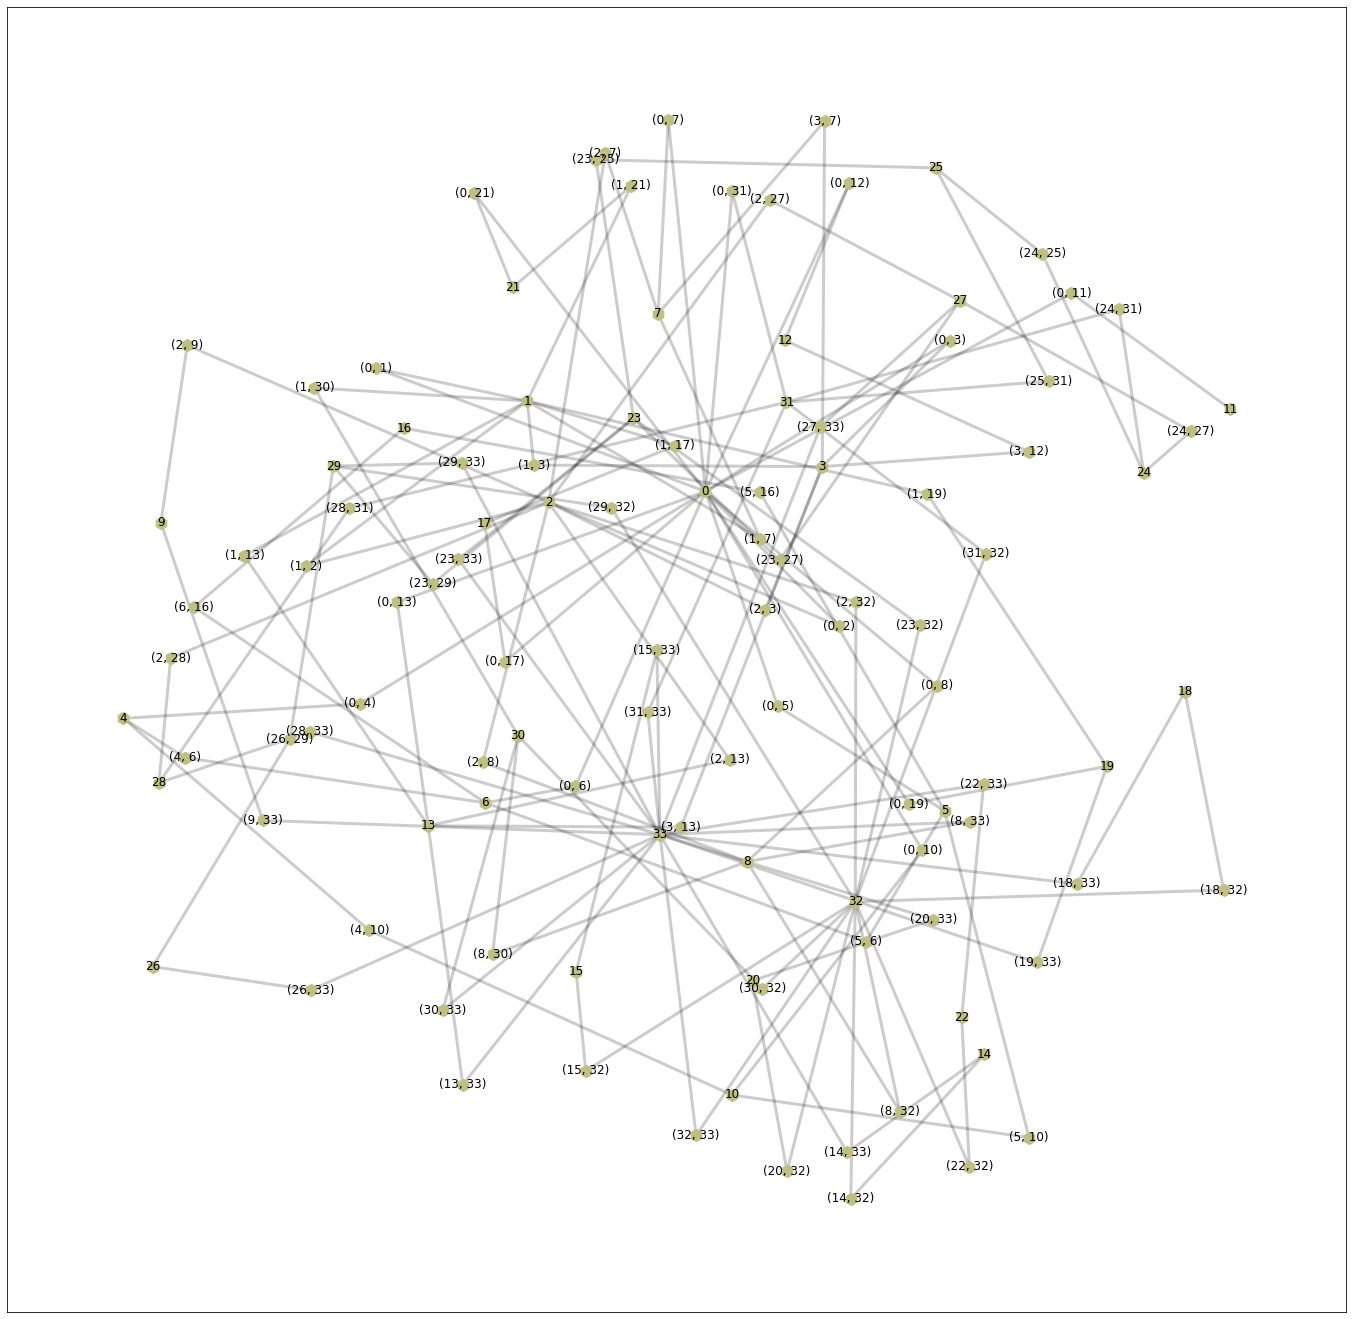

In [64]:
plt.figure(figsize=(24,24))
pos= nx.spring_layout(B, k=0.5)
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, node_color='#bfbf7f', node_shape='h', node_size=150)
nx.draw_networkx_labels(B, pos)

#### Projected co-affiliation Weighted

In [65]:
B_weighted= bipartite.weighted_projected_graph(B, node_list)

In [72]:
list(B_weighted.edges(data=True))[55]

(22, 32, {'weight': 1})

{0: Text(0.2943388506375397, -0.033352034356072216, '0'),
 1: Text(0.3640148846361287, -0.35062040865525906, '1'),
 2: Text(-0.006589192729146045, -0.30379778976588245, '2'),
 3: Text(0.18506445287875567, -0.3995742876533256, '3'),
 4: Text(0.5052795313385032, 0.4086194037956886, '4'),
 5: Text(0.6842960383078754, 0.2724748115950286, '5'),
 6: Text(0.7755474106874156, 0.33048353152600984, '6'),
 7: Text(0.2959347204955401, -0.5309144607877802, '7'),
 8: Text(0.009125312029424995, -0.016698215947305965, '8'),
 9: Text(-0.03757523395897569, -0.5756312395366415, '9'),
 10: Text(0.3371244712312822, 0.2424062828951429, '10'),
 11: Text(0.1580704150019983, 0.5830059457681486, '11'),
 12: Text(-0.11213651908073695, -0.11064749255978346, '12'),
 13: Text(0.17917877300524146, -0.24932756605232442, '13'),
 14: Text(-0.4118621550567996, 0.4532236514594887, '14'),
 15: Text(-0.5371488874774778, 0.35131254024436664, '15'),
 16: Text(1.0, 0.5157428303970087, '16'),
 17: Text(0.042959178834249795, -0

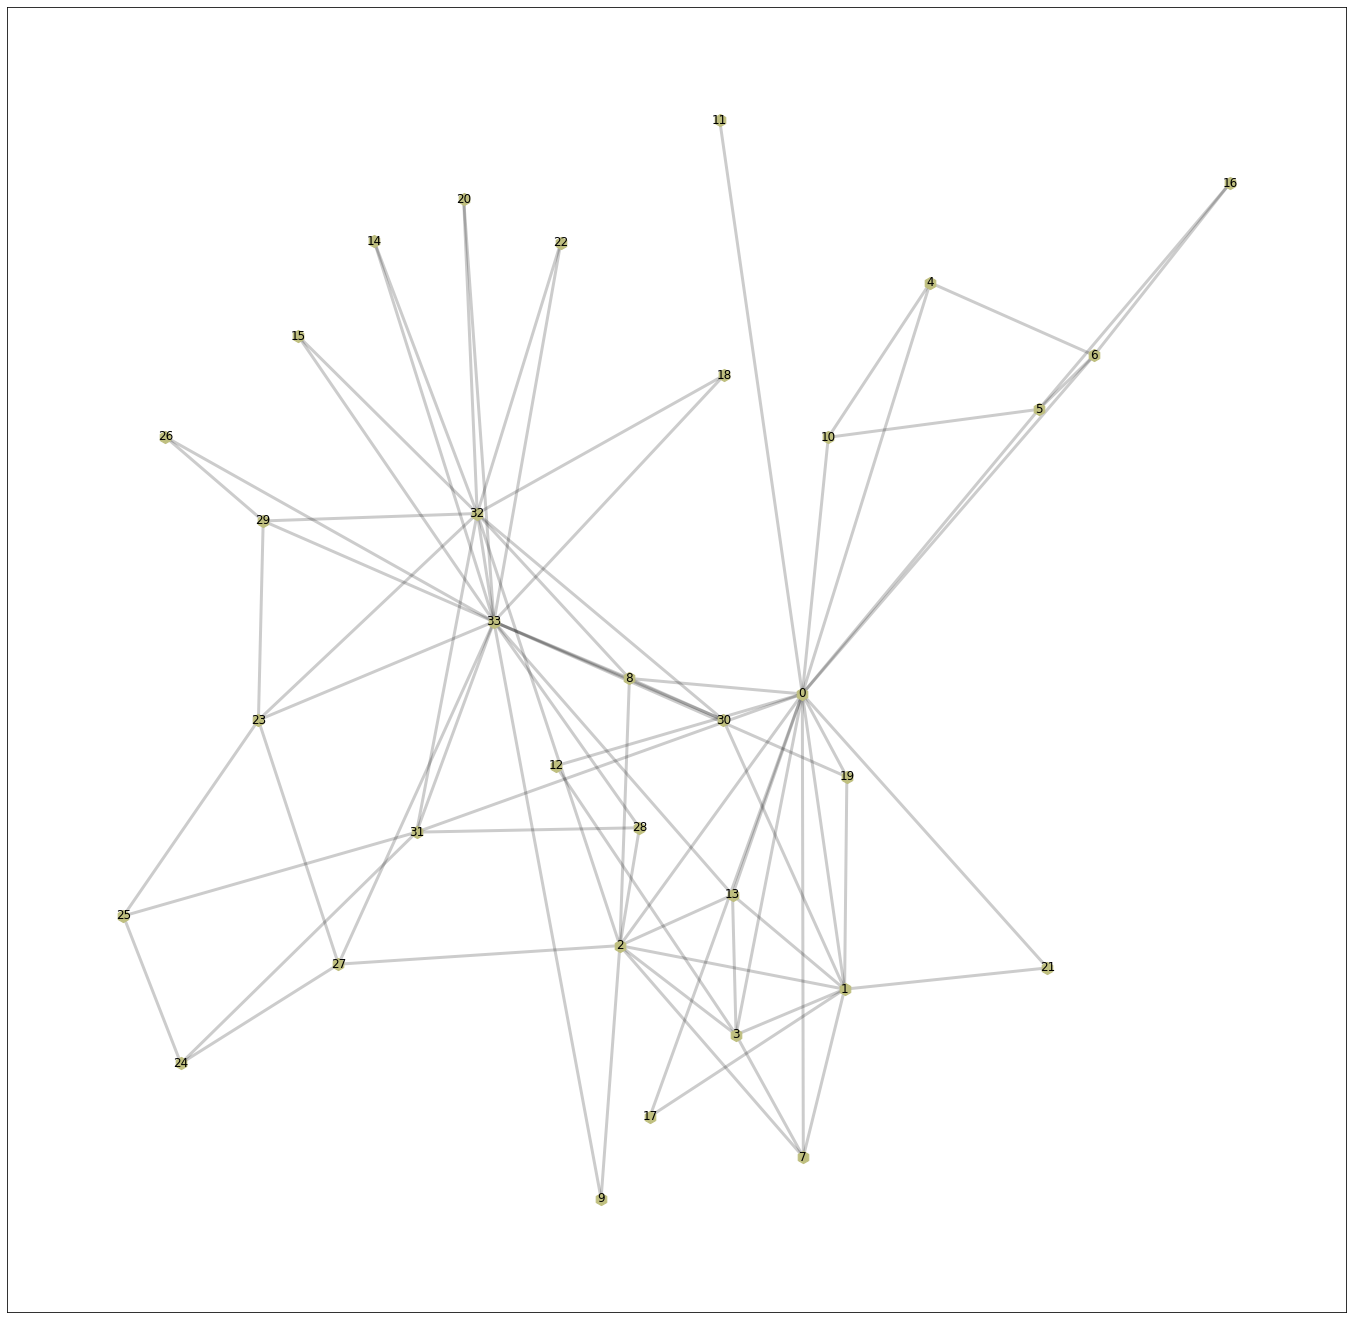

In [73]:
plt.figure(figsize=(24,24))
pos= nx.spring_layout(B_weighted, k=0.5)
nx.draw_networkx_edges(B_weighted, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B_weighted, pos, node_color='#bfbf7f', node_shape='h', node_size=150)
nx.draw_networkx_labels(B_weighted, pos)

#### Jaccard Index Projected

{0: Text(-0.18989946603023344, -0.1269795065811482, '0'),
 1: Text(-0.5025661591508468, -0.15551406959564976, '1'),
 2: Text(-0.02468338693610545, 0.171540581996509, '2'),
 3: Text(-0.39388806529335146, -0.47505358092408373, '3'),
 4: Text(0.4289946301095875, -0.5714510986221472, '4'),
 5: Text(0.41566793903146804, -0.3628874534132459, '5'),
 6: Text(0.8078936955912512, -0.4790898797710626, '6'),
 7: Text(-0.5312248172940162, 0.30565524612484796, '7'),
 8: Text(0.6703069219477386, -0.25673809379680884, '8'),
 9: Text(0.2585537363399716, 1.0, '9'),
 10: Text(-0.1656530136248543, -0.2827415821546031, '10'),
 11: Text(-0.7245731296309971, 0.6209822617842503, '11'),
 12: Text(0.20677696635532206, -0.8173285025687098, '12'),
 13: Text(-0.15148718708259637, -0.6749209038247382, '13'),
 14: Text(-0.16968691929041796, -0.9655282376353237, '14'),
 15: Text(-0.9183844668842651, -0.2872210840434711, '15'),
 16: Text(0.5539200983174632, 0.013222751918596174, '16'),
 17: Text(-0.2402250405882819, 0

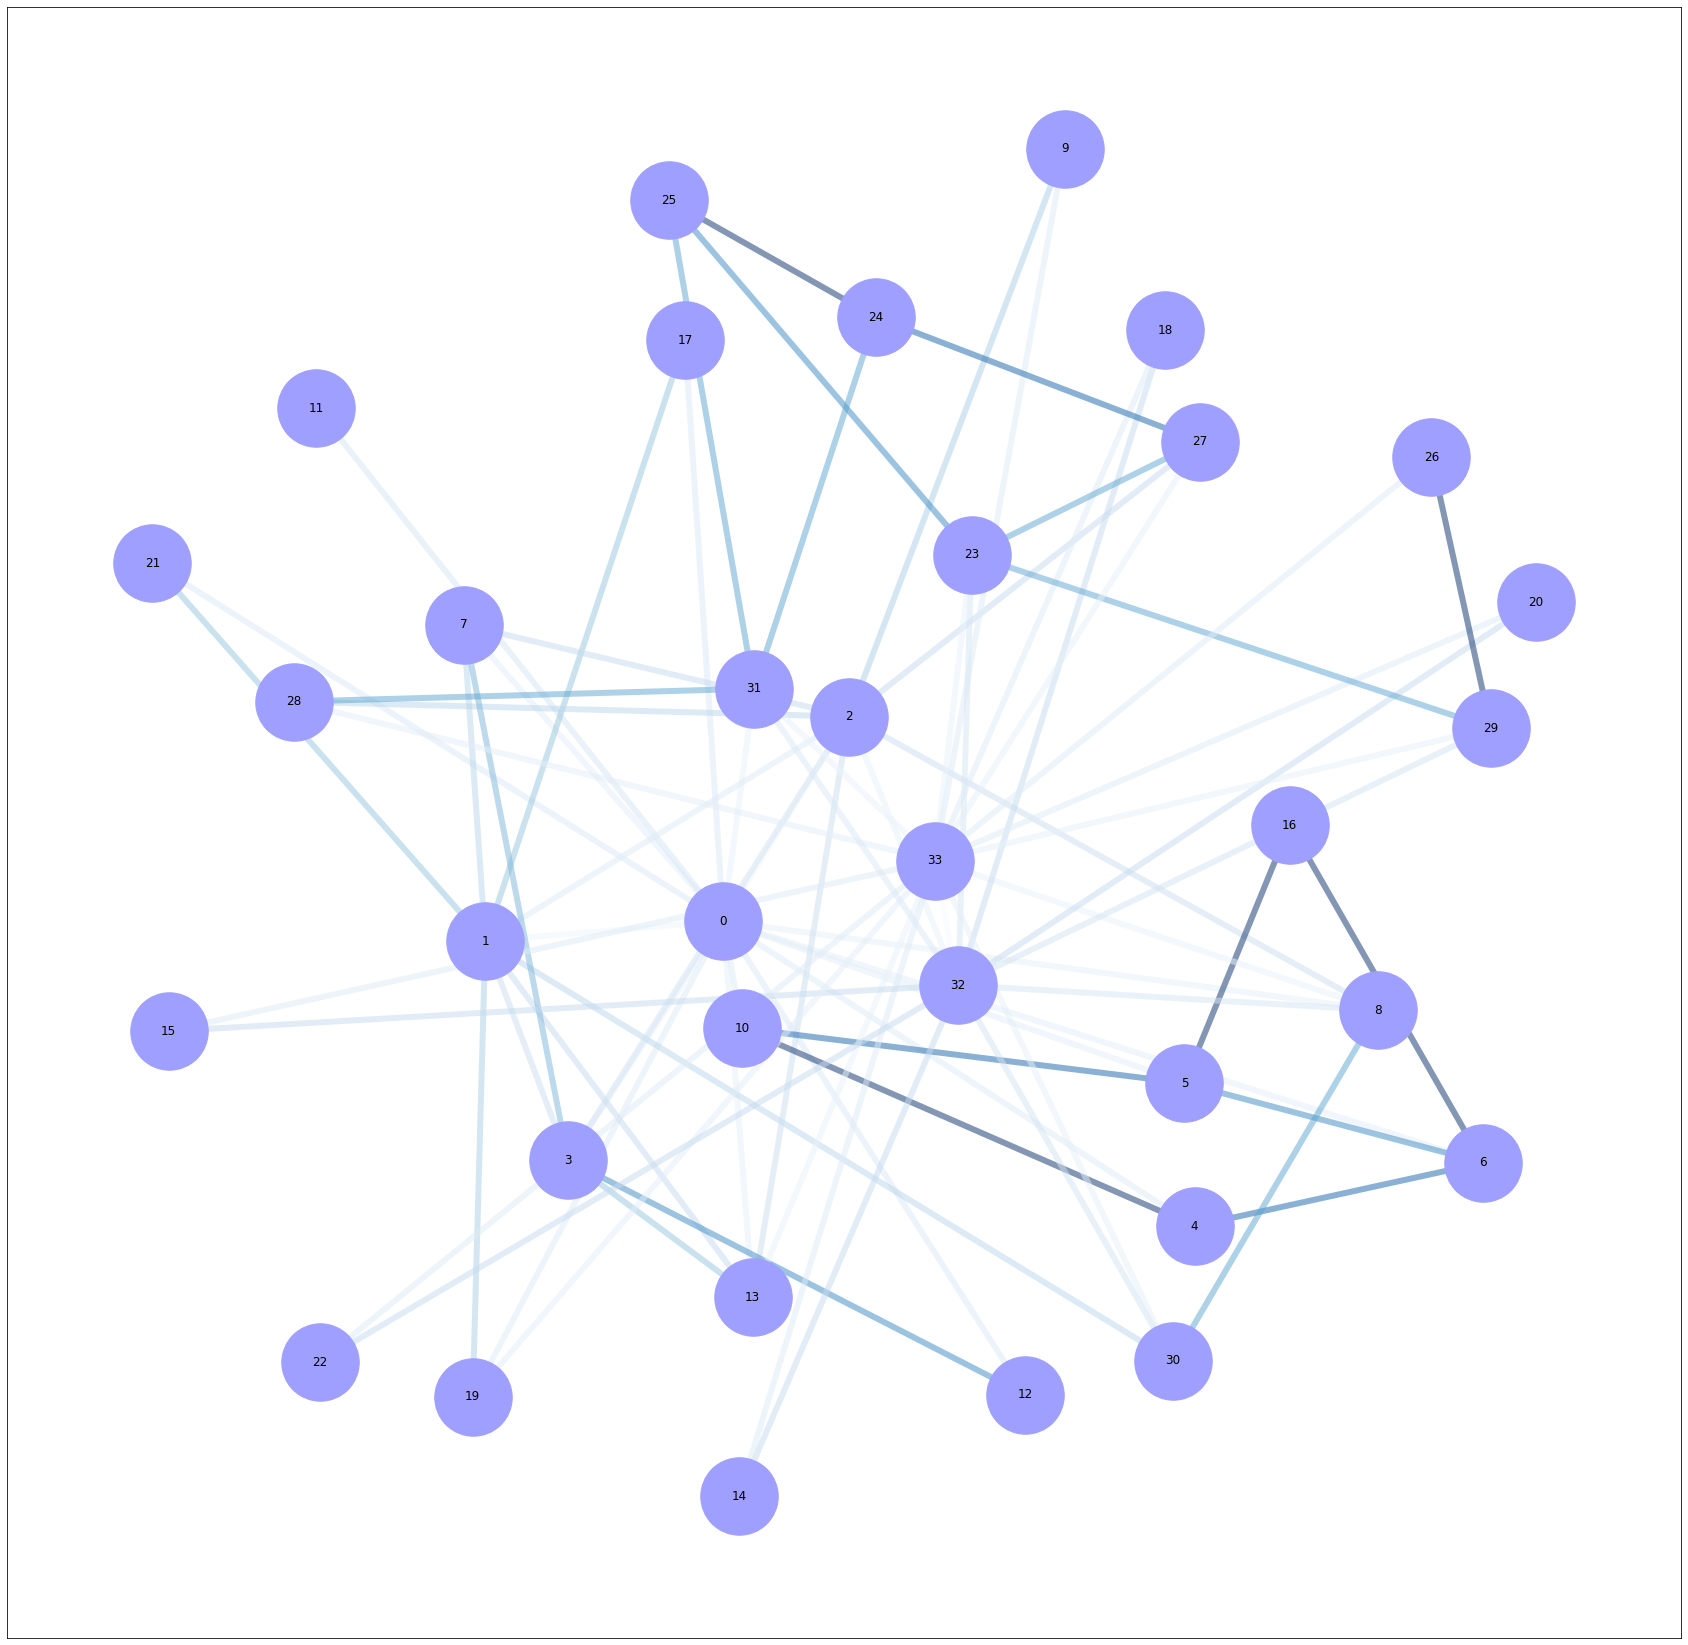

In [74]:
B_jaccard= bipartite.overlap_weighted_projected_graph(B, node_list)
weight= [B_jaccard.edges[e]['weight'] for e in B_jaccard.edges]
plt.figure(figsize=(30,30))
pos= nx.spring_layout(B_jaccard, weight= 'weight', k=0.5)
nx.draw_networkx_edges(B_jaccard, pos, edge_color= weight, edge_cmap= plt.cm.Blues,
    width=6, alpha=0.5)
nx.draw_networkx_nodes(B_jaccard, pos, node_color='#9f9fff', node_size= 6000)
nx.draw_networkx_labels(B_jaccard, pos)

In [77]:
list(B_jaccard.edges(data= True))[68]

(27, 33, {'weight': 0.05})

## Centrality

### Betweenness Centrality

In [85]:
betweenness= nx.betweenness_centrality(G, normalized=False, endpoints=True)

In [87]:
# for srteing the resulat of betweenness and showing some of them
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0:3]

[(0, 264.0714285714286), (33, 193.5515873015873), (32, 109.69047619047619)]

### Hubs- eigenvector centrality

In [88]:
eigenvector= nx.eigenvector_centrality(G)

In [90]:
# for srteing the resulat of eigenvector and showing some of them
sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[0:3]

[(33, 0.37337121301323506), (0, 0.35548349418519426), (2, 0.3171893899684447)]

### closeness Centrality

In [91]:
closeness= nx.closeness_centrality(G)

In [93]:
# for srteing the resulat of closeness and showing some of them
sorted(closeness.items(), key=lambda x: x[1], reverse=True)[0:3]

[(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55)]

### Local clustering

In [94]:
triangles= nx.triangles(G)

In [95]:
# for srteing the resulat of triangles and showing some of them
sorted(triangles.items(), key=lambda x: x[1], reverse=True)[0:3]

[(0, 18), (33, 15), (32, 13)]

In [96]:
clustering= nx.clustering(G)

In [98]:
people = list(G.nodes())

In [99]:
[(x, clustering[x]) for x in sorted(people, key= lambda x: eigenvector[x],reverse=True)[0:3]]

[(33, 0.11029411764705882), (0, 0.15), (2, 0.24444444444444444)]

## Large_Scale

### shortest path

In [5]:
G= nx.karate_club_graph()

In [6]:
list(nx.all_shortest_paths(G, 0, 33))

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]

In [7]:
nx.shortest_path_length(G, 0,33)

2

In [15]:
lenght_source_target= dict(nx.shortest_path_length(G))

In [16]:
lenght_source_target[0] [33]

2

In [21]:
def path_lenght_histogram(G, title=None):
    # Find path lengths
    length_source_target= dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest= sum([ 
        list(length_target.values())
        for length_target
        in length_source_target.values()],
    [])
    # Calculate integer bins
    high= max(all_shortest)
    bins= [-0.5 + i for i in range(high + 2)]
    # plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=1)
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Count')

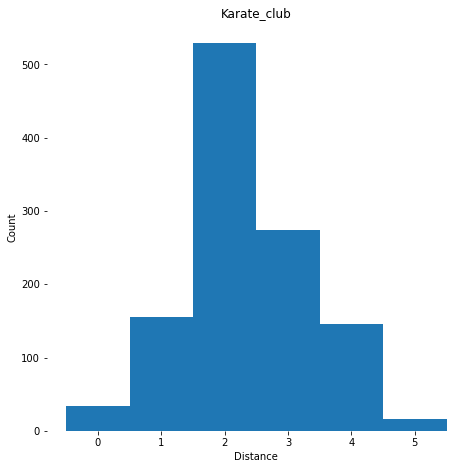

In [22]:
path_lenght_histogram(G, title='Karate_club')

#### the maen shortest path length- characteristic length

In [23]:
nx.average_shortest_path_length(G)

2.408199643493761

#### Diameter

In [24]:
nx.diameter(G)

5

### Global Clustering

In [25]:
nx.transitivity(G)

0.2556818181818182

In [26]:
nx.average_clustering(G)

0.5706384782076823

### Resilience

In [27]:
nx.density(G)

0.13903743315508021

#### Minimum cuts

In [29]:
nxcon.minimum_st_node_cut(G, 0, 33)

{2, 8, 13, 19, 30, 31}

In [30]:
nxcon.minimum_st_edge_cut(G, 0, 33)

{(0, 8),
 (0, 31),
 (1, 30),
 (2, 8),
 (2, 27),
 (2, 28),
 (2, 32),
 (9, 33),
 (13, 33),
 (19, 33)}

In [31]:
nx.node_connectivity(G, 0, 33)

6

In [32]:
nx.edge_connectivity(G, 0, 33)

10

#### Connectivity

In [33]:
nxcon.minimum_node_cut(G)

{0}

In [34]:
nxcon.minimum_edge_cut(G)

{(11, 0)}

In [36]:
nx.node_connectivity(G)

1

In [37]:
nx.edge_connectivity(G)

1

### Centralization and inequality

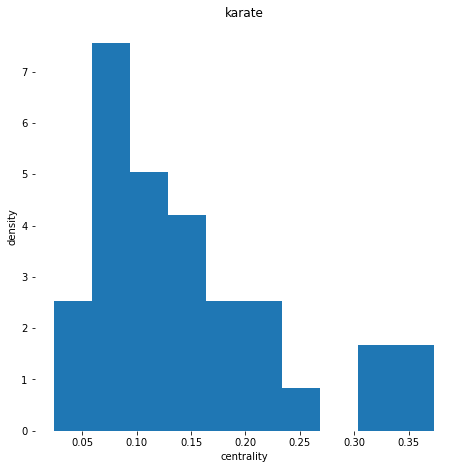

In [39]:
def centrality_histogram(x, title=None):
    plt.hist(x, density=True)
    plt.title(title)
    plt.xlabel('centrality')
    plt.ylabel('density')

centrality_histogram(nx.eigenvector_centrality(G).values(),title='karate')

#### entropy

In [43]:
def entropy(x):
    total= sum(x)
    x= [xi / total for xi in x]
    H= sum([-xi * math.log2(xi) for xi in x])
    return H

In [44]:
entropy(nx.eigenvector_centrality(G).values())

4.842401948329853

#### Gini index

In [ ]:
def gini(x);

### Local clustering

In [ ]:
clustering= nx.clustering(G)

In [ ]:
company=[]
for node_id in G.nodes:
    if G.nodes[node_id]['State']==0:
        company.append(node_id)

In [ ]:
[(x, clustering[x]) for x in sorted(company, key= lambda x: eigenvector[x], reverse=True)[0:10]]

## Communities

### Communities

In [5]:
G= nx.karate_club_graph()

In [7]:
communities= sorted (nxcom.greedy_modularity_communities(G), key= len, reverse= True)

In [8]:
communities

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [9]:
len(communities)

3

### visualize

In [10]:
def set_node_community(G, communities):
    '''Add community to node attribute'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community']= c + 1

In [11]:
def set_edge_community(G):
    '''Finde internal edges and add their community to their attributes'''
    for v, w in G.edges:
        if G.nodes[v]['community']== G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community']= G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[ v,w]['community']= 0

In [12]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''This function is for maping the itegers 1 to 16 to unique colors'''
    r0, g0 , b0 = 0,0,0
    n=16
    low, high = 0.1, 0.9
    span= high - low
    r= low + span * (((i+ r_off) * 3)% n)/ (n - 1)
    g= low + span * (((i+ g_off) * 5)% n)/ (n - 1)
    b= low + span * (((i+ b_off) * 7)% n)/ (n - 1)
    return (r, g, b)

In [13]:
# set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# set community color for nodes
node_color= [ 
    get_color(G.nodes[v]['community'])
    for v in G.nodes]
# set community color for internal edges
external= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']== 0]
internal= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']> 0]
internal_color= [ 
    get_color(G.edges[e]['community'])
    for e in internal]

In [14]:
karate_pos= nx.spring_layout(G)

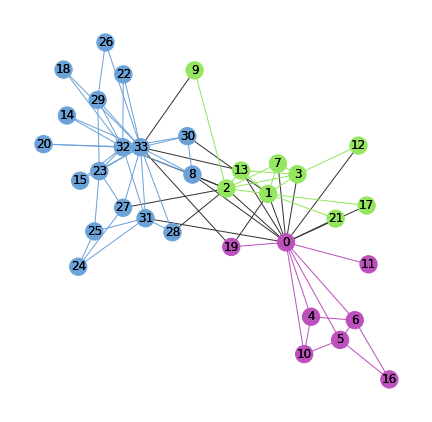

In [15]:
nx.draw_networkx( 
    G , pos= karate_pos, node_size= 10,
    edgelist= external, edge_color= "#333333")
nx.draw_networkx( 
    G, pos= karate_pos, node_color= node_color, edgelist= internal, edge_color= internal_color)

### Girvan_newman

In [16]:
result= nxcom.girvan_newman(G)

In [17]:
communities= next(result)

In [18]:
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [19]:
# set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# set community color for nodes
node_color= [ 
    get_color(G.nodes[v]['community'])
    for v in G.nodes]
# set community color for internal edges
external= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']== 0]
internal= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']> 0]
internal_color= [ 
    get_color(G.edges[e]['community'])
    for e in internal]

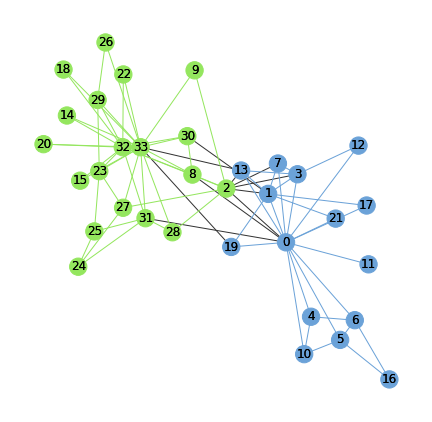

In [20]:
nx.draw_networkx( 
    G , pos= karate_pos, node_size= 10,
    edgelist= external, edge_color= "#333333")
nx.draw_networkx( 
    G, pos= karate_pos, node_color= node_color, edgelist= internal, edge_color= internal_color)

In [22]:
result= nxcom.girvan_newman(G)
communities= next(itertools.islice(result, 2, 3))

In [23]:
# set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# set community color for nodes
node_color= [ 
    get_color(G.nodes[v]['community'])
    for v in G.nodes]
# set community color for internal edges
external= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']== 0]
internal= [ 
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community']> 0]
internal_color= [ 
    get_color(G.edges[e]['community'])
    for e in internal]

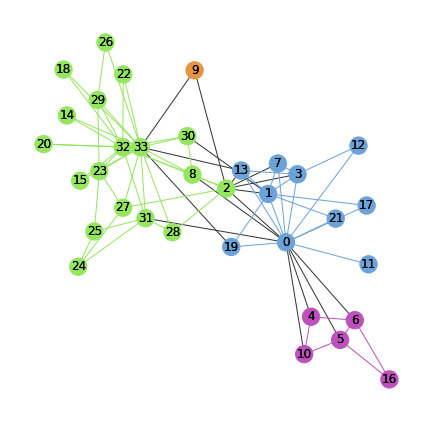

In [24]:
nx.draw_networkx( 
    G , pos= karate_pos, node_size= 10,
    edgelist= external, edge_color= "#333333")
nx.draw_networkx( 
    G, pos= karate_pos, node_color= node_color, edgelist= internal, edge_color= internal_color)

### Cliques

In [25]:
cliques= list(nx.find_cliques(G))

In [26]:
cliques

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [27]:
max_cliques= max(cliques, key=len)
max_cliques

[0, 1, 2, 3, 13]

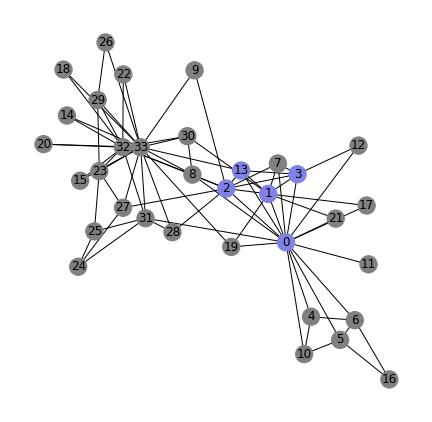

In [28]:
node_color= [(0.5,0.5,0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_cliques:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G, node_color= node_color, pos= karate_pos)

## Social network

### Tie strength

In [31]:
G = nx.karate_club_graph()
# Annotate with splinter club label
member_club= [ 
    0,0,0,0,0,0,0,0,1,1,
    0,0,0,0,1,1,0,0,1,0,
    1,0,1,1,1,1,1,1,1,1,
    1,1,1,1]
nx.set_node_attributes(G, dict(enumerate(member_club)), 'club')
internal= [ 
    (v, w) for v, w in G.edges
    if G.nodes[v]['club'] == G.nodes[w]['club']]
external= [ 
    (v, w) for v, w in G.edges
    if G.nodes[v]['club'] != G.nodes[w]['club']]

In [38]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors= set (G.neighbors(v))
    w_neighbors= set (G.neighbors(w))
    # Return size of the set intersection
    return 1+ len(v_neighbors & w_neighbors)

In [39]:
strength= dict ( 
    ((v, w), tie_strength(G, v, w))
    for v, w in G.edges())

In [40]:
strength

{(0, 1): 8,
 (0, 2): 6,
 (0, 3): 6,
 (0, 4): 3,
 (0, 5): 3,
 (0, 6): 3,
 (0, 7): 4,
 (0, 8): 2,
 (0, 10): 3,
 (0, 11): 1,
 (0, 12): 2,
 (0, 13): 4,
 (0, 17): 2,
 (0, 19): 2,
 (0, 21): 2,
 (0, 31): 1,
 (1, 2): 5,
 (1, 3): 5,
 (1, 7): 4,
 (1, 13): 4,
 (1, 17): 2,
 (1, 19): 2,
 (1, 21): 2,
 (1, 30): 1,
 (2, 3): 5,
 (2, 7): 4,
 (2, 8): 3,
 (2, 9): 1,
 (2, 13): 4,
 (2, 27): 1,
 (2, 28): 1,
 (2, 32): 2,
 (3, 7): 4,
 (3, 12): 2,
 (3, 13): 4,
 (4, 6): 2,
 (4, 10): 2,
 (5, 6): 3,
 (5, 10): 2,
 (5, 16): 2,
 (6, 16): 2,
 (8, 30): 3,
 (8, 32): 4,
 (8, 33): 3,
 (9, 33): 1,
 (13, 33): 1,
 (14, 32): 2,
 (14, 33): 2,
 (15, 32): 2,
 (15, 33): 2,
 (18, 32): 2,
 (18, 33): 2,
 (19, 33): 1,
 (20, 32): 2,
 (20, 33): 2,
 (22, 32): 2,
 (22, 33): 2,
 (23, 25): 1,
 (23, 27): 2,
 (23, 29): 3,
 (23, 32): 3,
 (23, 33): 4,
 (24, 25): 2,
 (24, 27): 1,
 (24, 31): 2,
 (25, 31): 2,
 (26, 29): 2,
 (26, 33): 2,
 (27, 33): 2,
 (28, 31): 2,
 (28, 33): 2,
 (29, 32): 3,
 (29, 33): 4,
 (30, 32): 3,
 (30, 33): 3,
 (31, 32): 2,

### bridge Span

In [41]:
def bridge_span(G):
    edges= G.edges()
    G= nx.Graph(G)
    result = dict()
    for v , w in edges:
        G.remove_edge(v, w)
        try:
            d= nx.shortest_path_length(G, v, w)
            result[(v, w)]= d
        except nx.NetworkXNoPath:
            result[(v, w)]= float('inf')
            # restore edge
            G.add_edge(v , w)
    return result

In [42]:
span= bridge_span(G)

In [43]:
span

{(0, 1): 2,
 (0, 2): 2,
 (0, 3): 2,
 (0, 4): 2,
 (0, 5): 2,
 (0, 6): 3,
 (0, 7): 3,
 (0, 8): 3,
 (0, 10): inf,
 (0, 11): inf,
 (0, 12): 3,
 (0, 13): 3,
 (0, 17): 3,
 (0, 19): 3,
 (0, 21): 5,
 (0, 31): inf,
 (1, 2): 2,
 (1, 3): 2,
 (1, 7): 3,
 (1, 13): 3,
 (1, 17): inf,
 (1, 19): 3,
 (1, 21): inf,
 (1, 30): inf,
 (2, 3): 2,
 (2, 7): 3,
 (2, 8): 2,
 (2, 9): 3,
 (2, 13): 3,
 (2, 27): 3,
 (2, 28): 3,
 (2, 32): inf,
 (3, 7): inf,
 (3, 12): inf,
 (3, 13): inf,
 (4, 6): 3,
 (4, 10): inf,
 (5, 6): 2,
 (5, 10): inf,
 (5, 16): inf,
 (6, 16): inf,
 (8, 30): 2,
 (8, 32): 2,
 (8, 33): inf,
 (9, 33): inf,
 (13, 33): inf,
 (14, 32): 2,
 (14, 33): inf,
 (15, 32): 2,
 (15, 33): inf,
 (18, 32): 2,
 (18, 33): inf,
 (19, 33): inf,
 (20, 32): 2,
 (20, 33): inf,
 (22, 32): 2,
 (22, 33): inf,
 (23, 25): 3,
 (23, 27): 2,
 (23, 29): 2,
 (23, 32): 2,
 (23, 33): inf,
 (24, 25): 2,
 (24, 27): 3,
 (24, 31): inf,
 (25, 31): inf,
 (26, 29): 2,
 (26, 33): inf,
 (27, 33): inf,
 (28, 31): 2,
 (28, 33): inf,
 (29, 32): 

### compare strenght and span

In [44]:
# Order edges by tie strength
ordered_edges= sorted (strength.items(), key= lambda x: x[1])
print ('Edge\t Strnght\t Span\t Internal')
# print 10 storngest
for e, edge_strength in ordered_edges [:10]:
    print('{:10}{}\t\t{}\t{}'. format( 
        str(e), edge_strength, span[e], G.edges[e]['internal']))
print('...')
# print 10 weakest
for e, edge_strength in ordered_edges[-10:]:
    print('{:10}{}\t\t{}\t{}'. format( 
        str(e), edge_strength, span[e], G.edges[e]['internal']))

Edge	 Strnght	 Span	 Internal


KeyError: 'internal'

### Simple Contagion

In [51]:
def propagate_simple (G):
    to_inflect = set([])
    # Find inflect nodes
    for v in G.nodes():
        if G.nodes[v]['infect'] == False:
            # Mark all neigbors for inflection
            for w in nx.neighbors(G, v):
                if G.nodes[w]['infected']:
                    to_inflect.add(v)
                    break
    # Inflect marked nodes
    for v in to_inflect:
        G.nodes[v]['infected'] = True

In [52]:
nx.set_node_attributes( 
    G,
    dict((i, False) for i in range (16)),
    'infected')
for i in range (2):
    G.nodes[i]['infected']= True
    plt.figure(figsize=(7.5, 2.5))

<Figure size 540x180 with 0 Axes>

<Figure size 540x180 with 0 Axes>

KeyError: 'infected'

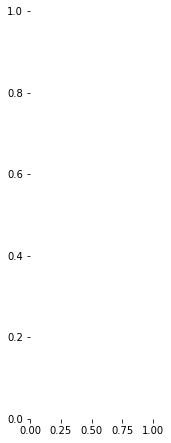

In [53]:
for i in range (3):
    plt.subplot(1, 3, i + 1)
    node_color= [ 
        '#bfbf7f' if G.nodes[v]['infected'] else '#9f9fff'
        for v in G.nodes]
    nx.draw_networkx( 
        G,
        pos= nx.circular_layout(G),
        node_color= node_color)
    propagate_complex(G)

### Complext Contagion

In [54]:
def propagate_complex(G):
    to_inflect= set([])
    # Find uniflected nodes
    for v in G.nodes():
        if G.nodes[v]['infected'] == False:
            inflected_neigbors= 0
            # Count inflected neigbors
            for w in nx.neighbors (G, v):
                if G.nodes[w]['infected']:
                    inflected_neigbors += 1
                    # remember nodes with 2+ inflected neighbors
                    if inflected_neigbors >= 2:
                        to_inflect.add (v)
    # Inflect new nodes
    for v in to_inflect:
        G.nodes[v]['infected'] = True

In [55]:
nx.set_node_attributes( 
    G,
    dict((i, False) for i in range (16)),
    'infected')
for i in range (2):
    G.nodes[i]['infected'] = True

KeyError: 'infected'

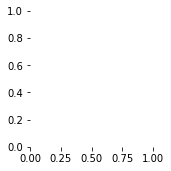

In [56]:
plt.figure(figsize= (7.5, 2.5))
for i in range (3):
    plt.subplot(1, 3, i + 1)
    node_color= [ 
        '#bfbf7f' if G.nodes[v]['infected'] else '#9f9fff'
        for v in G.nodes]
    nx.draw_networkx(G, pos= nx.circular_layout(G), node_color= node_color)
    propagate_complex(G)
    plt.title("Step {}". format(i))
plt.tight_layout()

## Simulating and analyzing

### watts_strogatz

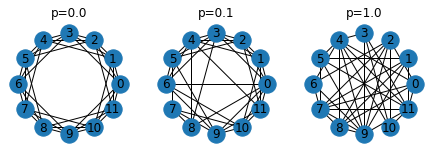

In [57]:
plt.figure( figsize=(7.5,2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    G= nx.watts_strogatz_graph(12, 6, p)
    plt.subplot(1, 3, i+1)
    pos= nx.circular_layout(G)
    nx.draw_networkx(G, pos)
    plt.title('p={:0.1f}'.format(p))

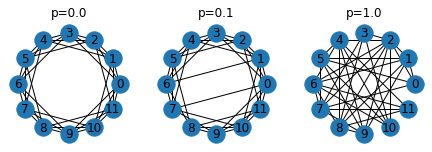

In [58]:
plt.figure( figsize=(7.5,2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    G= nx.watts_strogatz_graph(12, 6, p)
    plt.subplot(1, 3, i+1)
    pos= nx.circular_layout(G)
    nx.draw_networkx(G, pos)
    plt.title('p={:0.1f}'.format(p))

### preferential attachment

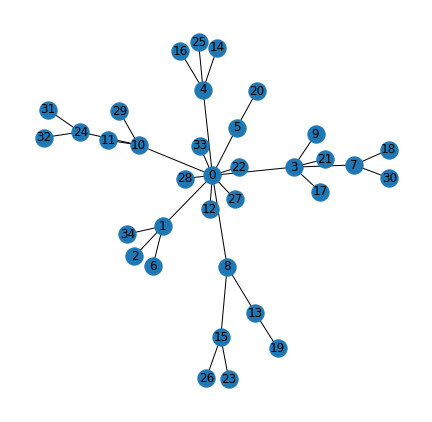

In [59]:
G_preferentail_35 = nx.barabasi_albert_graph(35, 1)
pos= nx.spring_layout(G_preferentail_35, k=0.1)
nx.draw_networkx(G_preferentail_35, pos)

In [61]:
G_preferentail_500 = nx.barabasi_albert_graph(500, 1)
pos= nx.spring_layout(G_preferentail_500)
nx.draw_networkx(G_preferentail_500, pos, node_size=0, with_labels=False)

ModuleNotFoundError: No module named 'scipy'

In [62]:
def plot_degree_hist (G, tilte):
    '''Plot histogam of node degrees'''
    plt.hist(dict(nx.degree(G)).values(), bins= range(1, 11))
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(tilte)

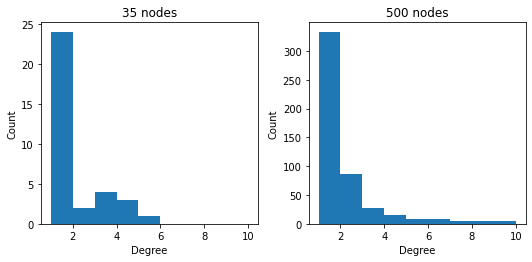

In [63]:
plt.figure(figsize=(7.5, 3.75))
ax = plt.subplot(1, 2, 1)
plot_degree_hist(G_preferentail_35, '35 nodes')
for spine in ax.spines.values():
    spine.set_visible(True)
ax= plt.subplot(1, 2, 2)
for spine in ax.spines.values():
    spine.set_visible(True)
plot_degree_hist(G_preferentail_500, '500 nodes')
plt.tight_layout()

### configuration models

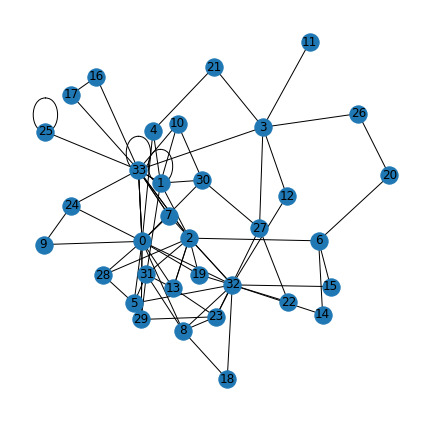

In [65]:
# Find degrees of karate club nodes
G= nx.karate_club_graph()
degree_sequence= dict(nx.degree(G)).values()
# Generate a random network with the same node degrees
G_configuration= nx.degree_seq.configuration_model(degree_sequence)
nx.draw_networkx(G_configuration)

In [66]:
degree_sequence

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

### agent_base models

In [71]:
def initial_beliefs(G, true_value=0, std=15):
    '''Generate estimate of a true value with normally_distributed errors'''
    beliefs= dict( 
        (v, random.gauss(true_value, std))
        for v in G.nodes())
    return beliefs

In [72]:
beliefs= initial_beliefs(G, true_value=42)

In [73]:
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors's beliefs'''
    new_beliefs= dict()
    for v in G.nodes():
        # Include old belief in average
        total= beliefs[v]
        count=1
        # Update average based on each neighbor
        for w in G.neighbors(v):
            total += beliefs[w]
            count += 1
        # Calculate average for node w
        new_beliefs[v]= total / count
    return new_beliefs

In [74]:
def plot_beliefs(G, initial_beliefs, true_value=0, steps=10):
    '''Plot change in beliefs over time'''
    current_beliefs= dict( initial_beliefs)
    beliefs= [current_beliefs]
    # creat dicts of x and y values for each node
    x= dict((v, list()) for v in G.nodes())
    y= dict((v, list()) for v in G.nodes())
    # Repeatedly update beliefs
    for i in range(steps + 1):
        for v in G.nodes():
            x[v].append(i)
            y[v].append(current_beliefs[v])
        if i< steps:
            current_beliefs= learning_step(G, current_beliefs)
            beliefs.append(current_beliefs)
    # Plot evolution of each node's beliefs
    for v in G.nodes():
        plt.plot(x[v], y[v], 'b-', alpha= 0.3, linewidth= 2)
    # Plot mean value
    mean_value= sum(initial_beliefs.values()) / len (initial_beliefs)
    plt.plot([0, steps], [mean_value, mean_value], 'k:')
    # add spines to plot
    ax= plt.gca()
    for spines in ax.spines.values():
        spine.set_visible(True)
    plt.xlim([0, steps])
    plt.ylim([22, 62])

In [80]:
# dict of networks
networks= { 
    'Karate Club': G,
    'Configuration model' : G_configuration,
    'Preferential attachment' : nx.barabasi_albert_graph(34, 1),
    'Ring' : nx.watts_strogatz_graph(34, 6, 0),
    'watts-storgatz (p=0.3)': nx.watts_strogatz_graph(34, 6, 0.1),
    'watts-storgatz (p=1)' : nx.watts_strogatz_graph(34, 6, 1)
}

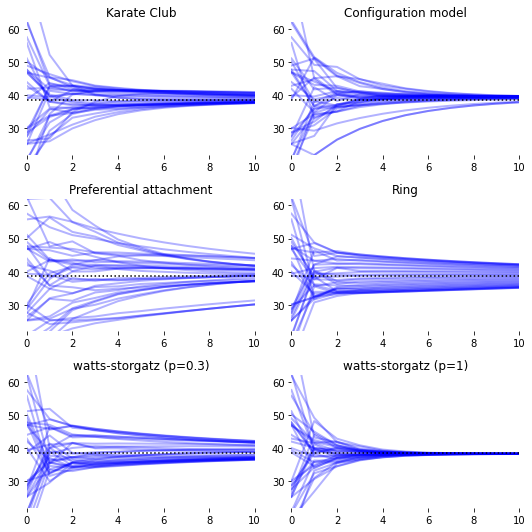

In [81]:
# simulate and plot results for each network
for i, (title, G) in enumerate(networks.items()):
    plt.subplot(3, 2, i + 1)
    plt.title(title)
    plot_beliefs(G, beliefs, 42)
plt.tight_layout()

## Location and events

### Networks in space

#### Gravity model

In [87]:
# load data file into network
from pathlib import Path
data_dir= 'c:\\Users/ah.roudsaz/Desktop/carrier.csv'
G_air= nx.Graph()
with open( data_dir) as f:
    # Skip header
    next(f)
    #Loop through data rows
    for row in f:
        count, v, w, year, month= row.strip().split(',')
        count= int(count)
        if count == 0 or v == w:
            continue
        try:
            G_air.edges[v, w]['count'] += count
        except KeyError:
            G_air.add_edge(v, w, count=count)

In [90]:
# adding langitude and latitude
airport_lat_long= {}
data_dir_partow= 'C://Users/ah.roudsaz/Desktop/partow.txt'
with open (data_dir_partow) as f:
    for row in f:
        columns= row.strip().split(',')
        code= columns[1]
        lat= float(columns[14])
        long= float(columns[15])
        airport_lat_long[code]= (lat, long)

In [92]:
for v in list(G_air.nodes()):
    try:
        lat, long= airport_lat_long[v]
        if long == 0 or long < -128.6 or lat == 0 or lat < 23.5:
            G_air.remove_node(v)
            continue
        G_air.nodes[v]['lat'] = lat
        G_air.nodes[v]['long'] = long
    except KeyError:
        G_air.remove_node(v)

In [93]:
G_air= nx.subgraph(G_air, max(nx.connected_components(G_air), key = len))

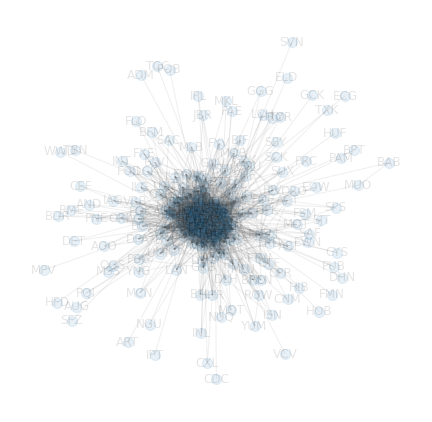

In [97]:
nx.draw_networkx( 
    G_air, node_size= 100, with_labels=True, edge_color= '#666666', alpha= 0.1
)

In [99]:
pos= dict()
for v in G_air.nodes:
    long = G_air.nodes[v]['long']
    lat = G_air.nodes[v]['lat']
    pos[v] = ((long + 90) * math.cos(2 * math.pi * lat / 360), lat)

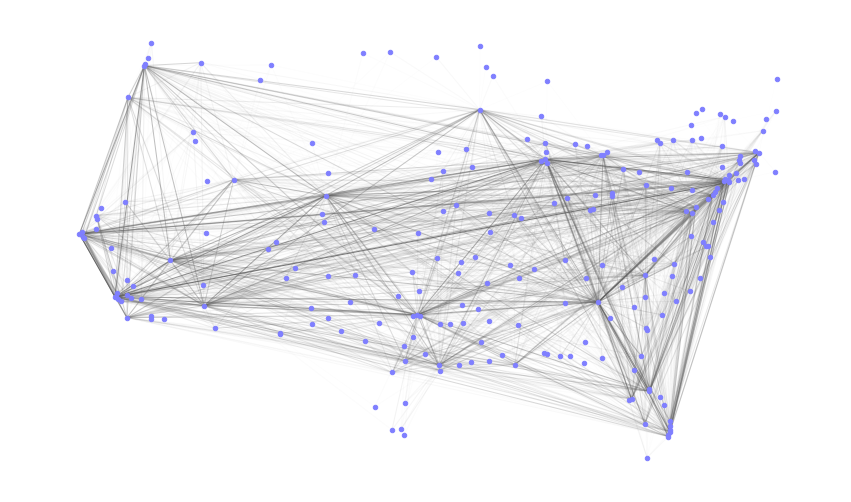

In [101]:
fig = plt.figure(figsize= (15,15))
ax = plt.subplot(1, 1, 1)
max_weight= max([G_air.edges[e]['count'] for e in G_air.edges])
nx.draw_networkx_nodes(G_air, pos= pos, node_color= '#7f7fff' , node_size= 20)
for e in G_air.edges:
    alpha= G_air.edges[e]['count'] / max_weight
    nx.draw_networkx_edges( 
        G_air, pos=pos, edgelist=[e], edge_color= '#666666', alpha= alpha, arrows=False)
ax.set_aspect(1)

#### Haversine formula- distance detection of each edge

In [102]:
def haversine (q, p):
    '''Calculate the distance between two (lat, long) points'''
    R_km = 6371
    theta1= q[1] * math.pi / 180
    phi1 = q[0] * math.pi / 180
    theta2 = p[1] * math.pi / 180
    phi2 = p[0] * math.pi / 180
    dphi = phi2 - phi1
    dtheta= theta2 - theta1
    a = (math.sin(dphi/2) * math.sin(dphi/2) + (math.cos(phi1) * math.cos(phi2) * math.sin(dtheta/2)* math.sin(dtheta/2)))
    c = 2* math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R_km * c
    return d

In [103]:
for v, w in G_air.edges:
    p_v = (G_air.nodes[v]['lat'], G_air.nodes[v]['long'])
    p_w = (G_air.nodes[w]['lat'], G_air.nodes[w]['long'])
    G_air.edges[v, w]['distance'] = haversine(p_v, p_w)

In [104]:
# now need mass of each node, according to application values can be used to show the capacity or population
degree = G_air.degree(weight= 'count')
nx.set_node_attributes(G_air, dict(degree), 'degree')

In [107]:
g_list = []
for v, w in G_air.edges():
    if v >=w:
        continue
    try:
        count = G_air.edges[v, w]['count']
    except KeyError:
        g_list.append (0)
        continue
    distance = G_air.edges[v ,w]['distance']
    v_degree = G_air.nodes[v]['degree']
    w_degree = G_air.nodes[w]['degree']
    g_list.append(count * distance ** 2 / v_degree / w_degree)

In [108]:
# value that stored in g_list are combined into a single constant multiplier using the geometric maen
g = 10 ** (sum( [math.log10(g) for g in g_list]) / len(g_list))

In [109]:
# now g multipleir can be used to predict how mach traffic should cross each based solely on the traffic through the endpoints and their distance form each other.
# residual: the difference between the expected traffic and the actual traffic.
for v, w in G_air.edges:
    if v == w:
        continue
    count = G_air.edges[v, w]['count']
    # Calculate ecpected weight
    expected = ( 
        g * G_air.nodes[v]['degree']
        * G_air.nodes[w]['degree']
        / G_air.edges[v,w]['distance'] ** 2
    )
    G_air.edges[v, w]['expected']= expected
    # Calculate residual
    G_air.edges[v, w]['residual'] = count - expected
    G_air.edges[v, w]['log_residual'] = math.log10(count) - math.log10(expected)

#### Residual network

In [110]:
residual_edges= [e for e in G_air.edges if G_air.edges[e]['log_residual'] > 0]
G_residual = G_air.edge_subgraph(residual_edges)
# Keep the largest connected component
G_residual = nx.subgraph(G_residual, max(nx.connected_components(G_residual), key= len))

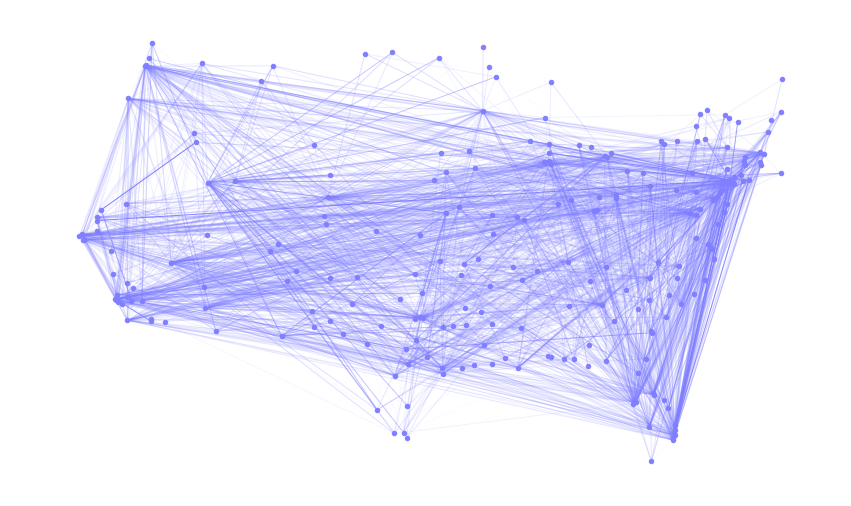

In [113]:
fig = plt.figure (figsize= (15,15))
ax = plt.subplot (1, 1, 1)
max_weight = max ([G_residual.edges[e]['log_residual'] for e in G_residual.edges])
nx.draw_networkx_nodes(G_residual, pos=pos, node_color= '#7f7fff',node_size = 20)
for e in G_residual.edges:
    alpha = G_residual.edges[e]['log_residual'] / max_weight
    nx.draw_networkx_edges( 
        G_residual, pos=pos, edgelist=[e], edge_color = '#7f7fff', alpha=alpha, arrows = False
    )
ax.set_aspect(1)

In [114]:
# Compare the average clustering of original aie transport network and residual one
nx.average_clustering(G_air)

0.6577002515250526

In [115]:
nx.average_clustering(G_residual)

0.43398207062240063

## Network in time

### Layerd networks

In [122]:
data_dirr= r'C:\Users/ah.roudsaz/Desktop/wiki.txt'
G_wiki = nx.read_edgelist( 
    data_dirr, data= [('begin', int), ('end', int)],
     create_using= nx.MultiGraph)

In [123]:
len(G_wiki)

43509

In [131]:
# creating snapshots
def get_snaoshot(G, date):
    '''Convert date to integer timestamp'''
    dt = dat.strftime(date, '%Y-%m-%d',__format=str)
    timestamp = time.mktime(dt.timetuple())
    # Find edges that exsisted during timestamp
    snapshot_edges = []
    for e in G.edges:
        if G.edges[e]['begin'] <= timestamp and G_wiki.edges[e]['end'] >= timestamp:
            snapshot_edges.append(e)
    # Create network from edges
    return nx.Graph(G.edge_subgraph(snapshot_edges))

In [126]:
# specify the dates to visualize
dates = [ 
    '2001-10-01'
    '2001-10-08'
    '2001-10-15'
    '2001-10-22'
    '2001-10-29'
    '2001-11-06'
]

In [132]:
# Create a figure
plt.figure(figsize= (10,15))
# Visualize the networkfor each date
pos = None
for i, date in enumerate (reversed(dates)):
    # Get a snapshot if network
    G = get_snaoshot(G_wiki, date)
    # Creat a subplot
    plt.subplot(3, 2, 6 - i)
    plt.title(date)
    # Calculate the layout
    pos= nx.spring_layout(G, pos=pos, k=0.09)
    # Visualize
    nx.draw_networkx( 
        G, pos=pos, alpha= 0.5, edge_color = '#333333', node_size= 0,
        with_labels = False
    )

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

<Figure size 720x1080 with 0 Axes>

### evolution

In [133]:
year = 2001
month = 10
clustering = []
for i in range (24):
    date = '{}-{}-01'.format(year, month)
    G= get_snaoshot(G_wiki, date)
    clustering.append(nx.average_clustering(G))
    # Update month and year
    month += 1
    if month > 12:
        month -= 12
        year +=1

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

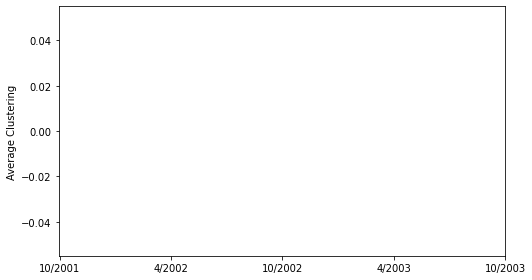

In [135]:
# Create figure
plt.figure(figsize= (7.5,4))
ax = plt.subplot(1, 1, 1)
for spine in ax.spines.values():
    spine.set_visible(True)
# Plot clusterinh over time
plt.plot (clustering)
# Add labels and ticks
plt.ylabel ('Average Clustering')
plt.xticks( 
    [0, 6, 12, 18, 24], ['10/2001','4/2002','10/2002','4/2003','10/2003']
)
plt.tight_layout()

## Visualizing

### Circular layout

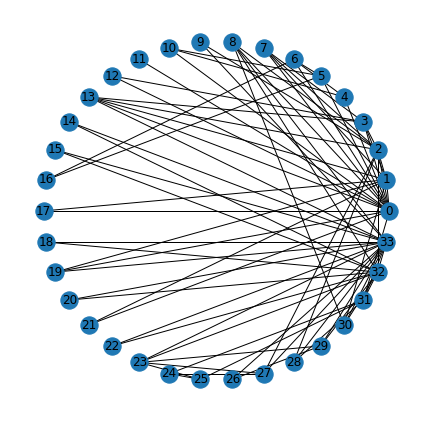

In [136]:
G= nx.karate_club_graph()
nx.draw_networkx(G, pos= nx.circular_layout(G))

In [137]:
def community_net (G_in):
    G_out = nx.Graph()
    node_color=[]
    node_community = {}
    communities = nxcom.greedy_modularity_communities(G_in)
    for i, com in enumerate(communities):
        for v in com:
            G_out.add_node(v)
            node_color.append(get_color(i))
            node_community[v]= i
    G_out.add_edges_from(G_in.edges())
    return node_color, node_community, G_out

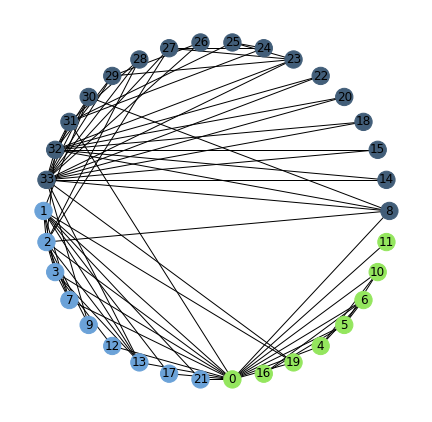

In [141]:
node_color, node_community, G_com = community_net(G)
nx.draw_networkx(G_com, pos= nx.circular_layout(G_com), node_color= node_color)

### Shell layout

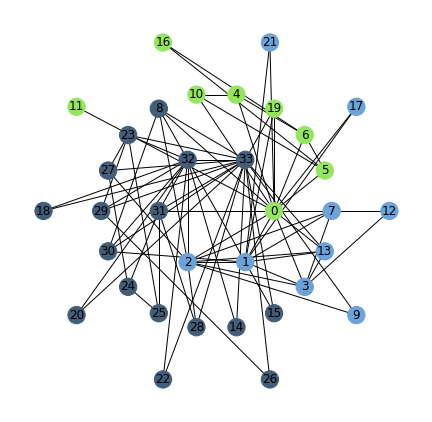

In [142]:
degrees = dict(G_com.degree())
labels = sorted(degrees.keys(), key = lambda x: degrees[x], reverse = True)
nlist = []
i, k= 0, 6
while i < len(labels):
    shell_labels = labels[i:i+k]
    ordered_labels = sorted(shell_labels, key = lambda x: node_community[x])
    nlist.append(ordered_labels)
    i += k
    k += 12
pos = nx.shell_layout(G_com, nlist=nlist)
cm = plt.get_cmap('cool')
nx.draw_networkx(G_com, pos, alpha=1, node_color=node_color, with_labels=True)

### forced-directed layout

### Null models

In [143]:
def residual_net (G):
    G_residual= nx.Graph(G)
    # Calculate weighted degrees
    degrees = dict((v, 0) for v in G_residual.nodes)
    for e in G_residual.edges:
        v ,w= e
        degrees[v] += G_residual.edges[e]['count']
        degrees[w] += G_residual.edges[e]['count']
    # Claculate total edge in network
    M = sum([G_residual.edges[e]['count'] for e in G_residual.edges])
    # Find residual weight foe each node pair
    for v in G_residual.nodes:
        for w in G_residual.nodes:
            dv= degrees[v]
            dw = degrees[w]
            # only count each once
            if v>= w:
                continue
            # Expected fraction of weights associated with each endpoint
            # Factor of two adjusts normalization for excuding v >=w
            expected = (dv / M / 2) * (dw / M / 2) *2 *M
            if expected == 0:
                continue
            try:
                count = G_residual.edges[v , w]['count']
                log_residual = math.log10(count) - math.log10(expected)
                G_residual.edges[v,w]['log_residual'] = log_residual
            except KeyError:
                continue
    return G_residual

In [ ]:
# generate residual network
G_residual= residual_net (G_frank)

In [ ]:
# Find edges with residuals above a threshold
threshold = 3.2
edges = [ 
    (v,w) for v,w,d in G_residual.edges(data=True)
    if d['log_residual'] > threshold
]
# Create a network with only those edges
G_threshold = G_residual.edge_subgraph(edges)
# Find largest connected component
G_giant = G_threshold.subgragh(max(nx.connected_components(G_threshold), key=len))

In [ ]:
# Find communities
G = G_giant
node_color , node_community, G = community_net(G)
pos = nx.circular_layout(G)
nx.draw_networkx( 
    G, pos, node_size= 100, node_color= node_color, edge_color= '#999999', with_labels= False
)

In [ ]:
plt.figure(figsize= (15 ,15))
pos= nx.spring_layout(G, pos)
nx.draw_networkx( 
    G, pos, node_size= 0, edge_color= '#999999', with_labels=True
)
# Add margin for labels
plt.xlim([-1.1,1.1])